# **Heterogeneous Architecture**

- 일반적으로 이종(heterogeneous) 컴퓨팅 환경은 multicore CPU와 many-core GPU로 구성.
- GPU는 현재 standalone 플랫폼이 아니므로, CPU와 협력하는 프로세서.
 - 따라서, GPU는 PCI-Express bus를 통해 CPU 기반 host와 함께 동작해야 한다.
 - 이러한 이유로 일반적으로 CPU를 host, GPU를 device라고 부름.

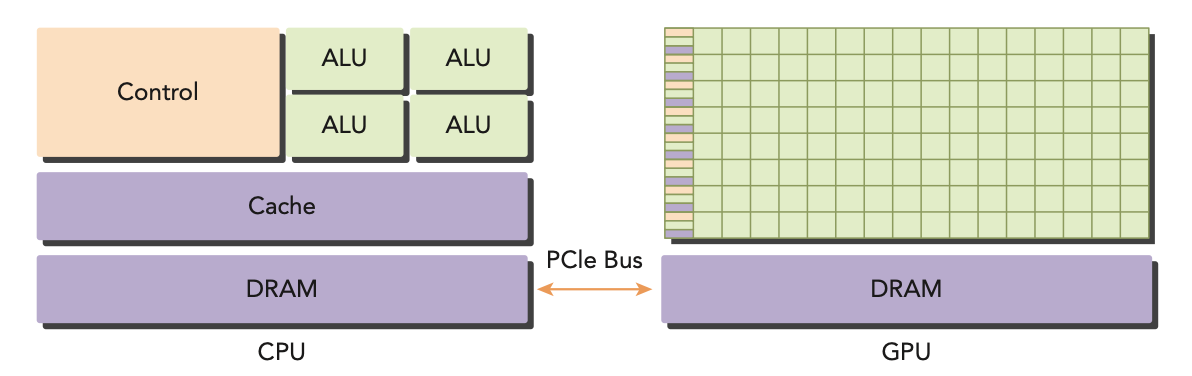

- 이러한 환경에서 실행되는 프로그램은 host code와 device code로 구성.
- Host code는 CPU에서 실행되며, device code는 GPU에서 실행.
- 일반적으로 CPU에 의해서 초기화되며, CPU는 envrionment, code를 관리하고 연산이 많이 필요한 태스크를 GPU에 맡기기 전에 데이터(for device)를 device에 실어준다.



- 연산량이 매우 많은 프로그램에서는 보통 많은 양의 데이터를 병렬화할 수 있는데, GPU는 이러한 데이터 병렬처리를 가속화하는데 사용.
- 프로그램 내에서 연산량이 많은 부분을 가속해주는 하드웨어갸 CPU와 물리적으로 분리되어 있다면 하드웨어 가속기(hardware accelerator) 라고 칭한다.
 - GPU는 가장 흔한 하드웨어 가속기 중 하나.

**NVIDIA GPU computing platform은 아래의 제품군에서 이용 가능하며, 저마다의 목적이 존재.**

- Tegra : for embedded devices
- GeForce : for consumer
- Quadro : for professional visualization
- Tesla : for datacenter parallel computing

GPU 제품마다 capability가 다른데, capability 중 가장 중요한 두 가지는 CUDA 코어의 수와 메모리 크기이다.

# **Paradigm of Heterogeneous Computing**

- GPU 연산은 단순히 CPU 연산을 대체하는 것이 아님.
- CPU나 GPU 연산은 프로그램에 따라 저마다의 이점이 존재.
 - CPU 연산은 제어와 관련된 태스크에 좋음
 - GPU 연산은 데이터 병렬처리 태스크에 좋음.
- CPU는 짧은 시퀀스의 연산가 예측할 수 없는 control-flow와 같은 dynamic workload에 최적화되어 있고, GPU는 단순한 control-flow에서 연산이 많은 태스크에 최적화되어 있다.
- CPU와 GPU의 사용 분야를 parallelism level과 data size로 카테고리화하면, 각각의 위치를 아래 그림과 같이 나타낼 수 있다.

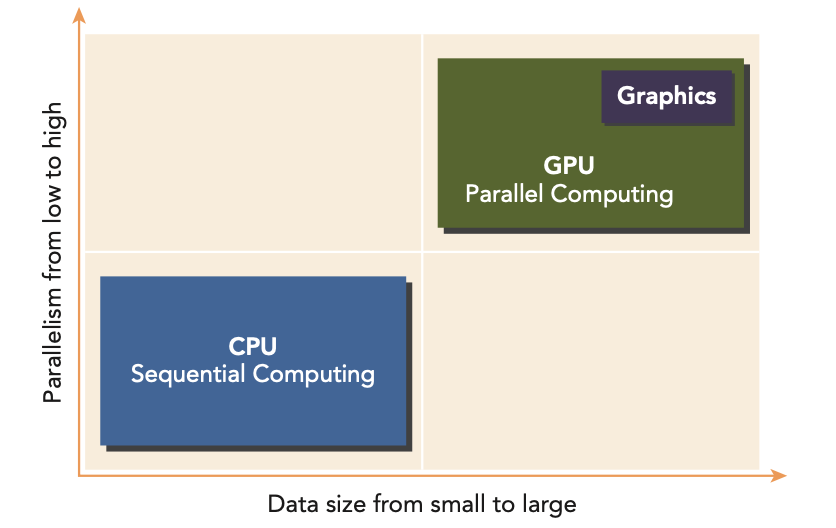

- 만약 처리할 데이터 크기가 작고 복잡한 제어 로직을 가지고 있다면, CPU로 처리하는 것이 더 유리할 것.
- 비교적 간단한 로직이지만 처리해야할 데이터가 매우 많다면, 많은 programmable 코어(massive multi-threading 활용)를 가진 GPU로 처리하는 것이 유리할 것.

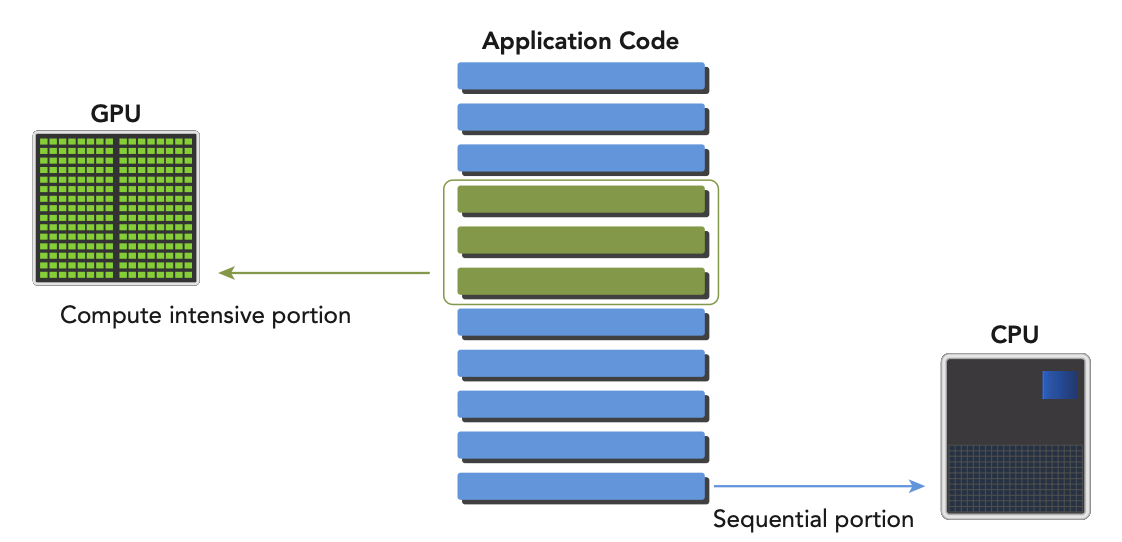

결과적으로 CPU와 GPU를 함께 사용하여 최적의 성능을 보여주려면, 순차 코드와 태스크를 병렬화시키는 부분은 CPU로 처리하고 거대한 데이터 병렬처리가 필요한 부분에서는 GPU를 사용해야 한다.

- 이와 같은 방식으로 코드를 작성하면 CPU와 GPU가 서로 보완하며 CPU + GPU 이종 환경에서 연산 능력을 최대로 활용할 수 있다.
- CUDA는 NVIDIA 플랫폼에서 CPU + GPU 실행을 지원하기 위해 도입되었으며, CUDA를 잘 알고 있어야 성능을 최대한으로 끌어올릴 수 있다.

# **CUDA : A Platform for Heterogeneous Computing**

- CUDA는 범용 병렬 연산 플랫폼이며, NVIDIA GPU에서 병렬 연산 엔진을 활용하는 프로그래밍 모델.
- CUDA를 사용해서 CPU에서 하던 것처럼 GPU에서 연산을 수행할 수 있다.

- CUDA C는 표준 C ANSI의 확장에 몇 가지 GPU 프로그래밍을 위한 것들이 추가된 것.
 - CUDA C++도 지원하며, 이에 대한 내용은 공식 문서를 통해 살펴볼 수 있다.
 - 간단한 CUDA APIs를 통해 GPU 장치/메모리 등을 관리할 수 있다.
 - CUDA는 다양한 NVIDIA GPU에 코드 변경없이 병렬 처리를 적용할 수 있는 scalable programming model.

CUDA는 GPU device와 GPU의 스레드(thread)를 관리하기 위해 두 가지 API를 제공한다.

- CUDA Driver API
- CUDA Runtime API

이들의 계층 관계를 표현하면 아래 그림과 같다.

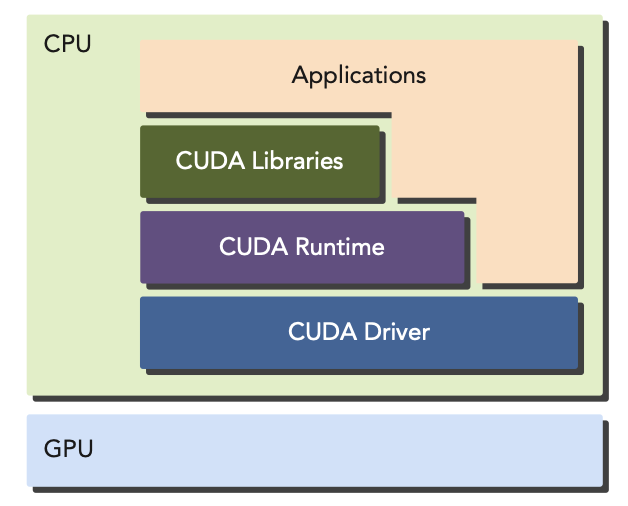

- Driver API는 low-level API 이며, 비교적 프로그래밍하기 까다롭다.
 - driver API를 사용하면 GPU device를 더욱 정교하게 컨트롤할 수 있다.
- Runtime API는 higher-level API 이며, driver API 바로 위에서 실행.
 - Runtime API의 각 함수들을 자세히 뜯어보면 driver API들로 구성되어 있다고 볼 수 있다.

- Runtime API와 Driver API 간에 알려진 성능 차이는 없다.
- 성능은 GPU 스레드를 어떻게 구성하고, 커널 함수 내에서 메모리를 어떻게 사용하는지에 따라 결정.
- 두 API를 섞어서 사용할 수도 있다.
 - 이에 관련된 내용은 공식 문서의 Interoperability between Runtime and Driver APIs에 설명하고 있다.



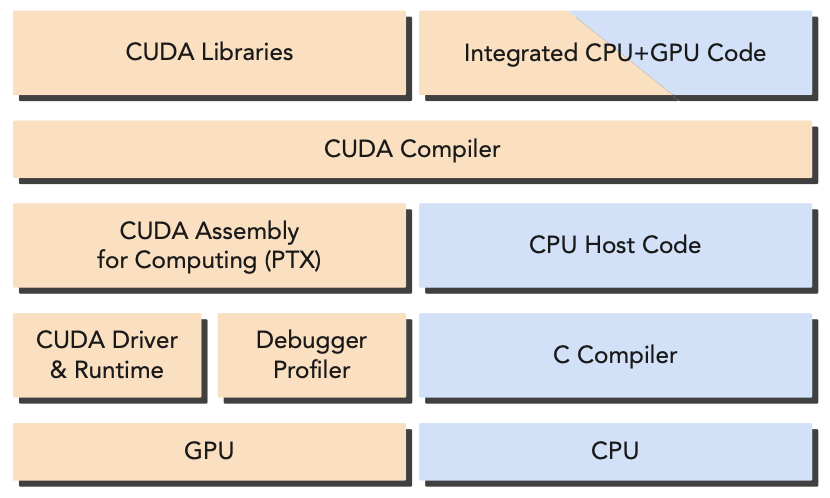

CUDA 프로그램 코드는 아래의 두 가지 파트로 구성된다.

- Host code (runs on CPU)
- Device code (runs on GPU)

NVIDIA CUDA nvcc 컴파일러는 컴파일 과정에서 device code를 host code와 분리시킨다.

- host code는 표준 C code이며 C 컴파일러로 컴파일된다.
- CUDA C로 작성된 device code는 nvcc에 의해 컴파일된다.
- 링킹 단계에서 CUDA Runtime 라이브러리가 추가된다.